In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron
%matplotlib qt

In [2]:
#track

trackx = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, \
                  0.8 ,0.8 ,0.8 ,0.8, 0.75, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0 ]) 
tracky = np.array([0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, \
                  0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1 ]) 
waypoints = np.vstack([trackx,tracky]).T

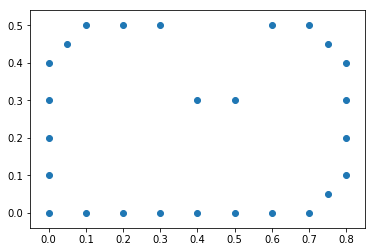

In [3]:
plt.scatter(trackx, tracky)


In [29]:
def interpolateclosedBezier(waypoints):
    n = len(waypoints)
    M = np.zeros([n,n])

    #build M
    tridiagel = np.matrix([[1, 4, 1]])
    for idx in range(n-2):
        M[idx+1:idx+2, idx:idx+3] = tridiagel

    M[0,0:2]= tridiagel[:,1:3]
    M[-1,-2:]= tridiagel[:,0:2]
    M[0:2,-1] = tridiagel[:,0].reshape(1,-1)
    M[-1,0] = tridiagel[:,0].reshape(1,-1)


    #build sol vector
    s =np.zeros([n,2])
    for idx in range(n-1):
        s[idx,:] = 2*(2*waypoints[idx,:] + waypoints[idx+1,:])
    s[-1:] = 2*(2*waypoints[-1,:] + waypoints[0,:])
    
    #solve for a & b
    Ax = np.linalg.solve(M,s[:,0])
    Ay = np.linalg.solve(M,s[:,1])

    a = np.vstack([Ax,Ay])
    b = np.zeros([2,n])

    b[:,:-1] = 2*waypoints.T[:,1:] - a[:,1:]
    b[:,0] = 2*waypoints.T[:,0] - a[:,0]
    
    return a, b
    
def evalclosedBezier(waypoints, a, b, t):
    segment = np.floor(t)
    segment = np.int(segment)
    n = len(waypoints)
    if segment>n:
        print("t out of bounds must be smaller than %d",n)
        coords = np.array([0,0])
        t =n-0.0001
    elif t<0:
        print("t out of bounds must be bigger than 0")
        t = 0
    t_val = t-segment
    coords = np.power(1 - t_val, 3) * waypoints.T[:,segment] + 3 * np.power(1 - t_val, 2) * t_val * a[:,segment]\
    + 3 * (1 - t_val) * np.power(t_val, 2) * b[:,segment] + np.power(t_val, 3) * waypoints.T[:,np.int(np.mod(segment+1,n))]

    return coords



In [30]:
a, b = interpolateclosedBezier(waypoints)
coords =[]
for t in np.linspace(0, 25.99, 1000):
    coords.append(evalclosedBezier(waypoints, a, b, t))
%matplotlib qt
coords = np.array(coords)
coords.shape

plt.plot(coords[:,0],coords[:,1])
plt.scatter(trackx, tracky)

In [35]:
#compute approx distance to arc param
dists = []

for idx in range(len(coords)):
    dists.append(np.sum(np.square(coords[idx,:]-coords[np.mod(idx+1,len(coords)-1),:])))

plt.figure()
plt.plot(np.linspace(0, 25.99, 1000), np.cumsum(np.array(dists)))
plt.xlabel("t (Bezier param) [-]")
plt.ylabel("s (approx. distance traveled) [m] ")

coeffs = np.polyfit(np.cumsum(np.array(dists)), np.linspace(0, 25.99, 1000), 3)
p = np.poly1d(coeff)
pc = coeffs.copy()
pc[-1] -= 25.9
xmax = np.roots(pc)[0]-.01
#plt.plot(np.linspace(0,0.355), p(np.linspace(0,0.355)).real)

coords_corr =[]
for t in np.linspace(0, xmax, 1000):
    coords_corr.append(evalclosedBezier(waypoints, a, b, p(t).real))
                  
dists_corr = []

for idx in range(len(coords)):
    dists_corr.append(np.sum(np.square(coords[idx,:]-coords[np.mod(idx+1,len(coords)-1),:])))

#plt.plot(np.linspace(0, xmax, 1000), np.cumsum(np.array(dists_corr)))

t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bounds must be bigger than 0
t out of bou

In [20]:
p(t).real

-2.5050685549025267

In [116]:
2*waypoints.T[:,1:] - a[:,1:]


array([[ 6.09773435e-02,  1.68179681e-01,  2.66303932e-01,
         3.66604592e-01,  4.67277700e-01,  5.64284609e-01,
         6.75583863e-01,  7.33379937e-01,  7.90896388e-01,
         8.03034512e-01,  7.96965564e-01,  8.09103231e-01,
         7.66621512e-01,  7.24410723e-01,  6.35735598e-01,
         5.32646884e-01,  4.33676864e-01,  3.32645659e-01,
         2.35740499e-01,  1.24392344e-01,  6.66901232e-02,
         8.84716270e-03, -2.07877401e-03, -5.32066669e-04,
         4.20704068e-03],
       [ 1.30851003e-02, -3.49467676e-03,  8.93606737e-04,
        -7.97501934e-05, -5.74605963e-04,  2.37817405e-03,
        -8.93809022e-03,  3.33741869e-02,  7.54413428e-02,
         1.64860442e-01,  2.65116890e-01,  3.74671999e-01,
         4.36195113e-01,  4.80547549e-01,  5.41614690e-01,
         3.52993690e-01,  2.46410551e-01,  4.61364106e-01,
         5.08133023e-01,  5.06103800e-01,  4.67451776e-01,
         4.24089094e-01,  3.36191846e-01,  2.31143522e-01,
         1.39234068e-01]])

In [75]:
b.shape

(52, 1)

In [67]:
waypoints.T[:,0].reshape(-1,1)

array([[0.],
       [0.]])

In [22]:
n=6
M = np.matrix([2*n,n])
tridiagel = np.matrix([[1, 4, 1],[1, 4, 1]])
M[3:n-2,:] = kron(np.eye(n),tridiagel)

ValueError: could not broadcast input array from shape (12,18) into shape (0,2)

In [24]:
kron(np.eye(n),tridiagel).shape

(12, 18)

In [27]:
C = 4 * np.identity(n)
#np.fill_diagonal(C[1:], 1)
np.fill_diagonal(C[:, 1:], 1)

In [28]:
C

array([[4., 1., 0., 0., 0., 0.],
       [0., 4., 1., 0., 0., 0.],
       [0., 0., 4., 1., 0., 0.],
       [0., 0., 0., 4., 1., 0.],
       [0., 0., 0., 0., 4., 1.],
       [0., 0., 0., 0., 0., 4.]])

In [29]:
C[:, 1:]

array([[1., 0., 0., 0., 0.],
       [4., 1., 0., 0., 0.],
       [0., 4., 1., 0., 0.],
       [0., 0., 4., 1., 0.],
       [0., 0., 0., 4., 1.],
       [0., 0., 0., 0., 4.]])